In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Apprentissage non supervisé - Réduction de dimensionnalité

# Analyse en Composantes Principales

## Illustration

L'ACP est une technique permettant de réduire la dimensionnalité des données, en créant une projection linéaire.
Autrement dit, l'objectif est de produire de nouvelles caractéristiques pour représenter les données qui sont une combinaison linéaire des anciennes données. Ainsi, nous pouvons considérer l'ACP comme une projection de nos données sur un *nouvel* espace de caractéristiques.

L'ACP trouve ces nouvelles caractéristiques (composantes) en recherchant les directions de variance maximale.
Habituellement, seules sont conservées les quelques composantes qui expliquent la plus grande partie de la variance des données. Le principe est de réduire la taille (dimensionnalité) d'un ensemble de données tout en capturant la plupart de ses informations. Il existe de nombreuses raisons pour lesquelles la réduction de la dimensionnalité peut être utile : Elle peut réduire le coût de calcul lors de l'exécution des algorithmes d'apprentissage, diminuer l'espace de stockage...

Pour illustrer ce à quoi peut ressembler la transformation, nous la montrons d'abord sur des données bidimensionnelles et ne conservons que la composante principale. En voici une illustration :

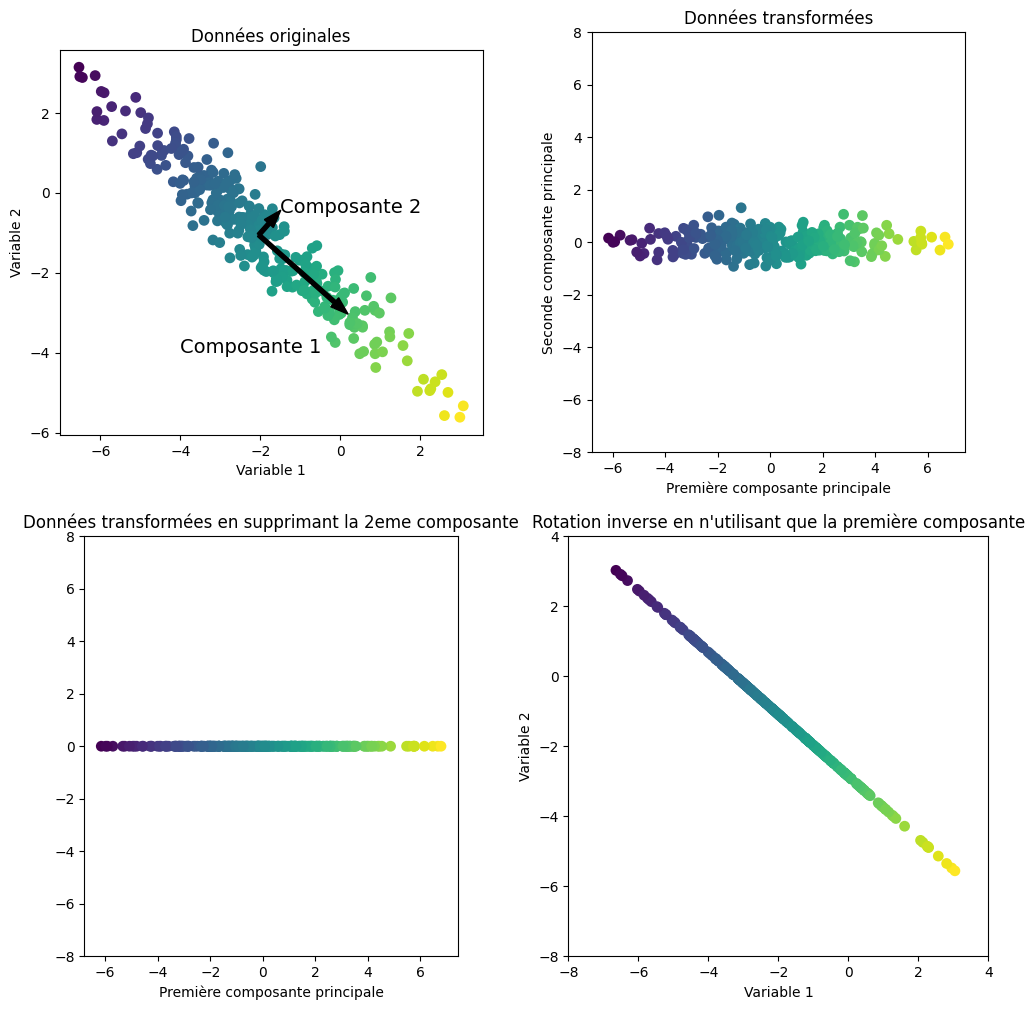

In [2]:
from figures.plot_pca import plot_pca_illustration
plot_pca_illustration()

## Application sur un exemple basic

Maintenant, entrons dans les détails des différentes étapes avec la PCA.
Pour cela, on construit un dataset artificiel basé sur une rotation de points générés par une loi normale.

D'abord, les données normalement distribuées, colorées par rapport à au signe de la variable 1

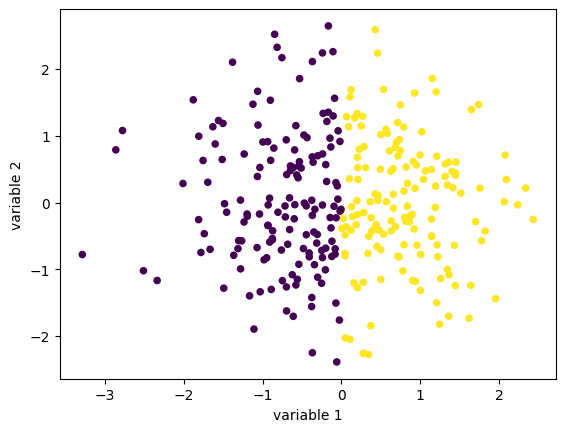

In [3]:
rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300, 2))
y = X_[:, 0] > 0

plt.scatter(X_[:, 0], X_[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("variable 1")
plt.ylabel("variable 2");

Puis, une petite déformation

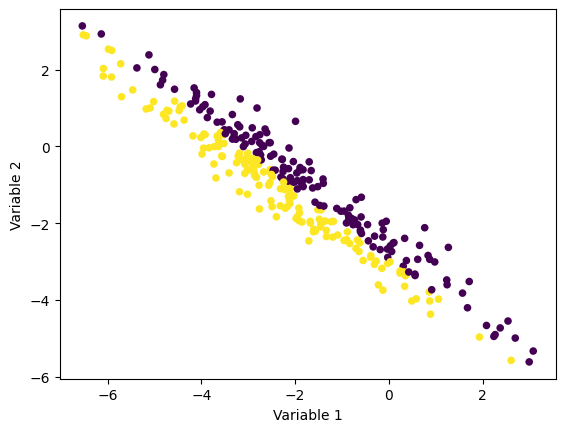

In [4]:
X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)

plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("Variable 1")
plt.ylabel("Variable 2");

On commence par instancier le modèle

In [5]:
from sklearn.decomposition import PCA
pca = PCA()

Puis on entraine la PCA

In [6]:
pca.fit(X_blob)

PCA()

Et on transforme les données dans leur nouvelle composantes

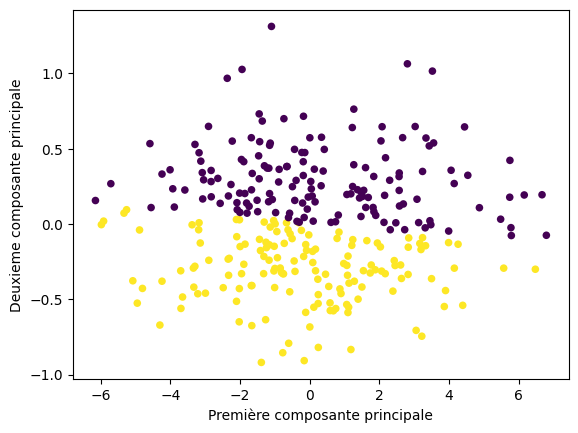

In [7]:
X_pca = pca.transform(X_blob)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("Première composante principale")
plt.ylabel("Deuxieme composante principale");

On retrouve la rotation appliqué (quasiment en tout cas)

On remarque que la première composante explique ~73% des données

In [11]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

Et qu'on perd un peu d'information avec ces transformations (~4%)

In [12]:
np.sum(pca.explained_variance_ratio_)

0.9581320720000164